# Project 9 - A Data Ananlysis of Your Own

Group members: Ruth Iiyambo and Angel Baikakedi \
Sources: Class Activity Notebooks specifically from Project 2 and 4 as well as Our World in Data for the datasets. \
Dataset links: https://ourworldindata.org/energy, https://ourworldindata.org/economic-growth \
Seaborn Handbook: https://seaborn.pydata.org/tutorial/introduction.html

# Analysis & Visualization

For this project, we decided to look at the global Gross Domestic Product (GDP) per capita, and energy use per capita.

Our World in Data defines energy use as not only including electricity, but also other areas of consumption including transport, heating and cooking.

Therefore, the thesis of this project asks - is there a relationship between GDP and energy use per capita? 

Our working hypothesis was that as the GDP increases, the energy use per capita increases, thus; there is a positive relationship between the two variables.

To investigate this relationship we asked 4 (four) questions. These questions were: 
1) Do countries with high energy use per capita also have a high GDP? And vice versa.
2) What was the country/countries with the highest energy use per capita for the most recent data (2019)? The lowest? And how does it compare with the earliest data we have from 1980?
3) Looking at Africa – Namibia and Botswana specifically as they have a similar population, do we see changes in the energy trends over the past decade? How similar or different are they? And does the GDP per capita “align”?
4) How do the economic and energy consumption trends of countries with populations close to Namibia's and Botswana's figures compare over the past decade?

As somewhat of an above and beyond component, we went ahead and compared energy trends between low and high-income countries overtime. 

Angel worked to answer the first two questions and supporting visualization as laid out above, and Ruth worked to asnwer the last two with the visualizations.

In [1]:
#importing the packages we will need for this analysis and loading it
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
gdp_data = pd.read_csv("gdp_per_capita.csv")

In [3]:
energy_data = pd.read_csv("per_capita_energy_use.csv")

In [4]:
gdp_data

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)"
0,Albania,ALB,1971,3159.8088
1,Albania,ALB,1972,3214.6665
2,Albania,ALB,1973,3267.8481
3,Albania,ALB,1974,3330.0708
4,Albania,ALB,1975,3385.2730
...,...,...,...,...
10103,Zimbabwe,ZWE,2015,2880.9058
10104,Zimbabwe,ZWE,2016,2919.6170
10105,Zimbabwe,ZWE,2017,3112.8750
10106,Zimbabwe,ZWE,2018,3007.2370


In [5]:
energy_data

,Entity,Code,Year,Primary energy consumption per capita (kWh/person)
0,Afghanistan,AFG,1980,623.92865
1,Afghanistan,AFG,1981,786.83690
2,Afghanistan,AFG,1982,926.65125
3,Afghanistan,AFG,1983,1149.19590
4,Afghanistan,AFG,1984,1121.57290
...,...,...,...,...
10597,Zimbabwe,ZWE,2017,3068.01150
10598,Zimbabwe,ZWE,2018,3441.98580
10599,Zimbabwe,ZWE,2019,3003.65530
10600,Zimbabwe,ZWE,2020,2680.13180


For both these datasets to be useful to us, we will need to do an inner merge on the variables Entity, Code and Year.

In [6]:
merged_data = gdp_data.merge(energy_data, on=['Entity','Code', 'Year'], how='inner')

In [7]:
merged_data

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Primary energy consumption per capita (kWh/person)
0,Albania,ALB,1980,3714.5410,16237.5740
1,Albania,ALB,1981,3786.3180,15870.4370
2,Albania,ALB,1982,3724.3580,15693.0410
3,Albania,ALB,1983,3775.8096,16071.5625
4,Albania,ALB,1984,3738.4922,15946.7680
...,...,...,...,...,...
7592,Zimbabwe,ZWE,2015,2880.9058,3860.9202
7593,Zimbabwe,ZWE,2016,2919.6170,3227.6802
7594,Zimbabwe,ZWE,2017,3112.8750,3068.0115
7595,Zimbabwe,ZWE,2018,3007.2370,3441.9858


# Question 1 - Do countries with high energy use per capita also have a high GDP?

To begin answering this question, we wanted to look at the country/countries with the highest GDP and energy use per capita overall, and the country/countries with the lowest GDP and energy use per capita overall to see if our hypothesis holds without looking at specific years.

In [12]:
#The code below returns the index of the first occurrence of the maximum value in the energy consumption per capita column.
highest_energy = merged_data.loc[merged_data['Primary energy consumption per capita (kWh/person)'].idxmax()]
highest_energy

Entity                                                    Qatar
Code                                                        QAT
Year                                                       1993
GDP per capita (output, multiple price benchmarks)    28928.467
Primary energy consumption per capita (kWh/person)     317440.5
Name: 5689, dtype: object

In [13]:
#The code below returns the index of the first occurrence of the maximum value in the GDP per capita column.
highest_gdp = merged_data.loc[merged_data['GDP per capita (output, multiple price benchmarks)'].idxmax()]
highest_gdp

Entity                                                    Qatar
Code                                                        QAT
Year                                                       2012
GDP per capita (output, multiple price benchmarks)    169200.27
Primary energy consumption per capita (kWh/person)    232316.58
Name: 5708, dtype: object

Here, we already find that although in different years, our hyothesis holds; and Qatar has the highest GDP and energy use per capita. Now to look at the lowest, we run the same code as above except we replace the max with a min.

In [14]:
#The code below returns the index of the first occurrence of the minimum value in the energy per capita column.
lowest_energy = merged_data.loc[merged_data['Primary energy consumption per capita (kWh/person)'].idxmin()]
lowest_energy

Entity                                                   Bhutan
Code                                                        BTN
Year                                                       1980
GDP per capita (output, multiple price benchmarks)    2085.9502
Primary energy consumption per capita (kWh/person)    95.291664
Name: 768, dtype: object

In [15]:
#The code below returns the index of the first occurrence of the minimum value in the energy per capita column.
lowest_gdp = merged_data.loc[merged_data['GDP per capita (output, multiple price benchmarks)'].idxmin()]
lowest_gdp

Entity                                                  Liberia
Code                                                        LBR
Year                                                       1996
GDP per capita (output, multiple price benchmarks)    246.74171
Primary energy consumption per capita (kWh/person)      737.954
Name: 4086, dtype: object

Again, we find that although in different years, our hyothesis doesn't hold; and Liberia has the lowest GDP and  Bhutan the lowest energy use per capita. 

# What was the country/countries with the highest energy use per capita for the most recent data (2019)? The lowest? And how does it compare with the earliest data we have from 1980?

To answer this question, we begin by filtering the merged dataset for the years 2019 and 1980 respectively.

In [16]:
merged_data_2019 = merged_data[merged_data['Year'] == 2019]

In [17]:
merged_data_1980 = merged_data[merged_data['Year'] == 1980]

We will then repeat the steps in question one here before we visualize the data.

In [18]:
highest_energy_2019 = merged_data_2019.loc[merged_data_2019['Primary energy consumption per capita (kWh/person)'].idxmax()]
highest_energy_2019

Entity                                                    Qatar
Code                                                        QAT
Year                                                       2019
GDP per capita (output, multiple price benchmarks)    114100.81
Primary energy consumption per capita (kWh/person)     208021.3
Name: 5715, dtype: object

In [19]:
highest_gdp_2019 = merged_data_2019.loc[merged_data_2019['GDP per capita (output, multiple price benchmarks)'].idxmax()]
highest_gdp_2019

Entity                                                    Qatar
Code                                                        QAT
Year                                                       2019
GDP per capita (output, multiple price benchmarks)    114100.81
Primary energy consumption per capita (kWh/person)     208021.3
Name: 5715, dtype: object

Once again, we find that Qatar has the highest GDP and energy use per capita, suggesting that our hypothesis holds.
However, as we already know, correlation does not imply causation, so there could be confounding variables. Does it hold for the lowest GDP and energy use per capita?

In [20]:
lowest_energy_2019 = merged_data_2019.loc[merged_data_2019['Primary energy consumption per capita (kWh/person)'].idxmin()]
lowest_energy_2019

Entity                                                Central African Republic
Code                                                                       CAF
Year                                                                      2019
GDP per capita (output, multiple price benchmarks)                   978.34937
Primary energy consumption per capita (kWh/person)                   299.18008
Name: 1427, dtype: object

In [21]:
lowest_gdp_2019 = merged_data_2019.loc[merged_data_2019['GDP per capita (output, multiple price benchmarks)'].idxmin()]
lowest_gdp_2019

Entity                                                  Burundi
Code                                                        BDI
Year                                                       2019
GDP per capita (output, multiple price benchmarks)      790.046
Primary energy consumption per capita (kWh/person)    309.34055
Name: 1177, dtype: object

Once again, we find that our hypothesis doesn't hold for the lowest GDP and energy use per capita.

To see this relationship more clearly, we will visualize the 2019 and 1980 data for comparison purposes.

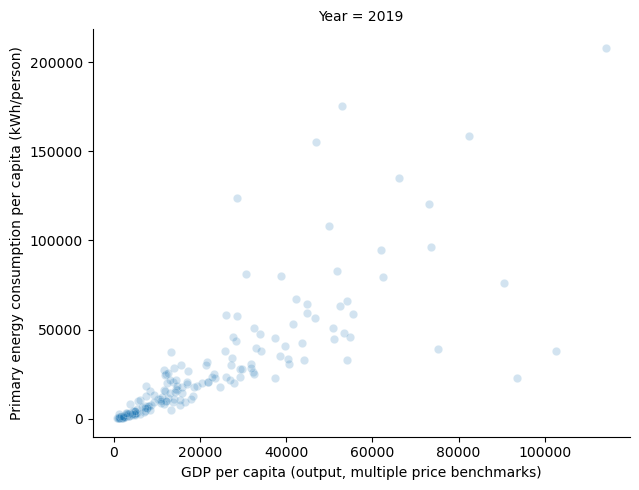

In [24]:
sns.relplot(
    data=merged_data_2019,
    x="GDP per capita (output, multiple price benchmarks)", y="Primary energy consumption per capita (kWh/person)",
    col="Year", alpha = 0.2, aspect=1.3, height=5
)

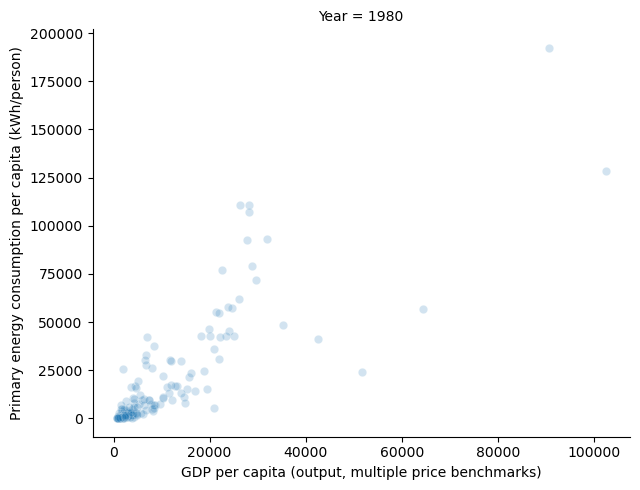

In [25]:
sns.relplot(
    data=merged_data_1980,
    x="GDP per capita (output, multiple price benchmarks)", y="Primary energy consumption per capita (kWh/person)",
    col="Year", alpha = 0.2, aspect=1.3, height=5
) 

Comparing energy and GDP in 1980 and 2019, we see that more countries generally had a lower GDP and energy use per capita in 1980 than in 2019.This could be due to reasons such as technological advancements and population increases. Overall, in both 1980 and 2019, the countries with a GDP per capita of <20000 also had a energy use per capita of less than 25000 kWh. We start seeing a divergence with the median GDP which we took to be between 50000 and 70000. Here we find that in 1980, where the countries with this income fall below 50000 kWh which is quite low, but in 2019, countries with the same output mostly fall between 50000kWh and 15000 kWh per person. At the highest output of between 80 000 and 100 000, we find that our hypothesis holds in 1980 where countries with the high GDP have a higher energy use per capita. However, with our 2019 data, there are anomalies where some countries with this output have lower/similar energy use as those countries with median income. 

Overall, the hypothesis that there is a positive relationship between energy use and GDP per capita holds for both years, although there is a stronger relationship in the year 2019.

To further clarify the relationship, we thought it would be informative to depict the distribution overtime using a bivariate plot.

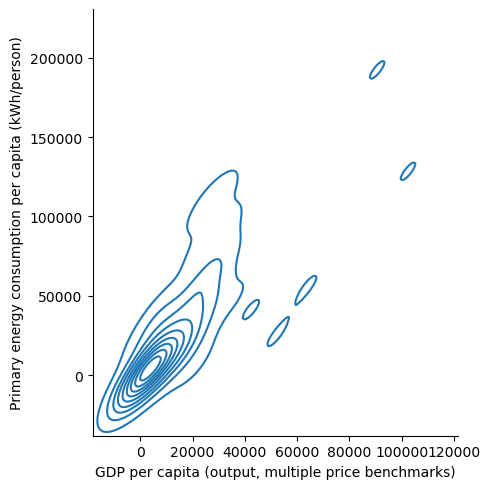

In [27]:
sns.displot(merged_data_1980, x="GDP per capita (output, multiple price benchmarks)", y= "Primary energy consumption per capita (kWh/person)", kind="kde")

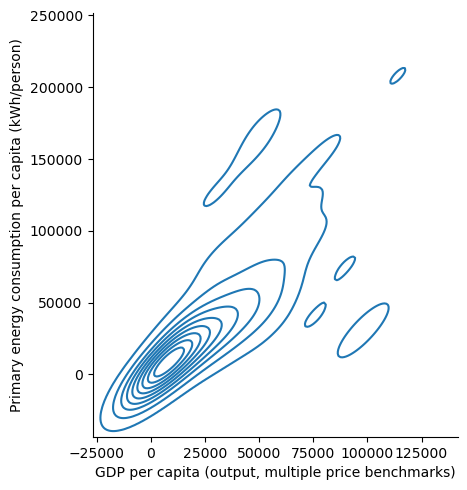

In [28]:
sns.displot(merged_data_2019, x="GDP per capita (output, multiple price benchmarks)", y= "Primary energy consumption per capita (kWh/person)", kind="kde")

Looking at comparison between low and high income countries, we have to create a new merged dataset as the initial one omits the data we need since it only contains data on energy use per capita and not GDP. So instead of an inner merge we do a right merge on the same variables.

In [29]:
income_data = gdp_data.merge(energy_data, on=['Entity','Code', 'Year'], how='right')

Now we will filter for low and high income data so that we are able to visualize energy use over time.

In [35]:
income_filtered = income_data.loc[(income_data['Entity'] == 'High-income countries') | (income_data['Entity'] == 'Low-income countries')]

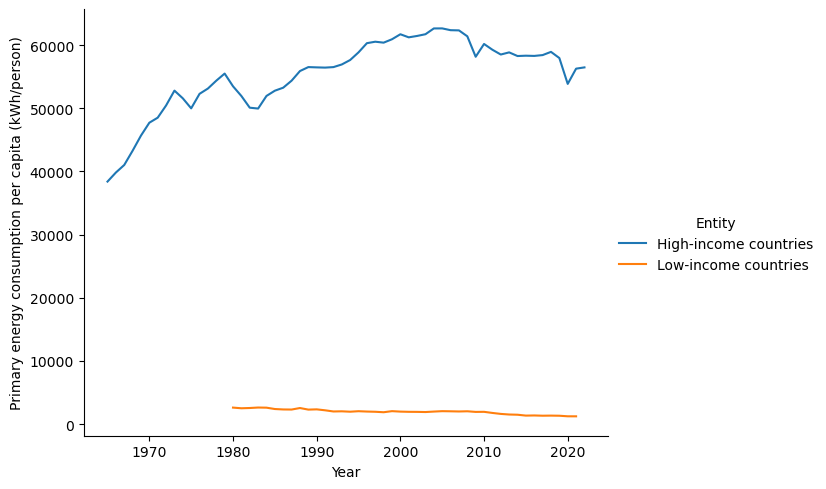

In [42]:
sns.relplot(
    data=income_data,
    x="Year", y="Primary energy consumption per capita (kWh/person)", aspect=1.3, height=5,
    kind ='line', hue='Entity'
) 

Overall, we find that there is a large disparity in energy-use between low-income and high-income countries over time. Additionally, the energy use per capita for low income countries has remained constant but has been on a steady rise for high-income countries.

# Question 3: Looking at Africa – Namibia and Botswana specifically as they have a similar population, do we see changes in the energy trends over the past decade? How similar or different are they? And does the GDP per capita “align”?

To begin with, we need to filter out information for Botswana and Namibia between the years 2010 and 2019.

In [37]:
# Filter for Namibia and Botswana
countries_filter = merged_data['Entity'].isin(['Namibia', 'Botswana'])

# Filter for the years 2010 through 2019
years_filter = merged_data['Year'].between(2010, 2019)

# Apply both filters
filtered_data = merged_data[countries_filter & years_filter]
filtered_data

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Primary energy consumption per capita (kWh/person)
905,Botswana,BWA,2010,14527.120,8901.267
906,Botswana,BWA,2011,15922.705,9151.255
907,Botswana,BWA,2012,14734.384,8872.199
908,Botswana,BWA,2013,14868.127,8641.081
909,Botswana,BWA,2014,16191.077,8513.395
910,Botswana,BWA,2015,15194.871,10171.935
911,Botswana,BWA,2016,15642.398,10964.355
912,Botswana,BWA,2017,16208.257,9879.757
913,Botswana,BWA,2018,16123.994,9597.184
914,Botswana,BWA,2019,16484.375,9467.984


Now we'd like to answer our question with a scatterplot to see the trends over time.

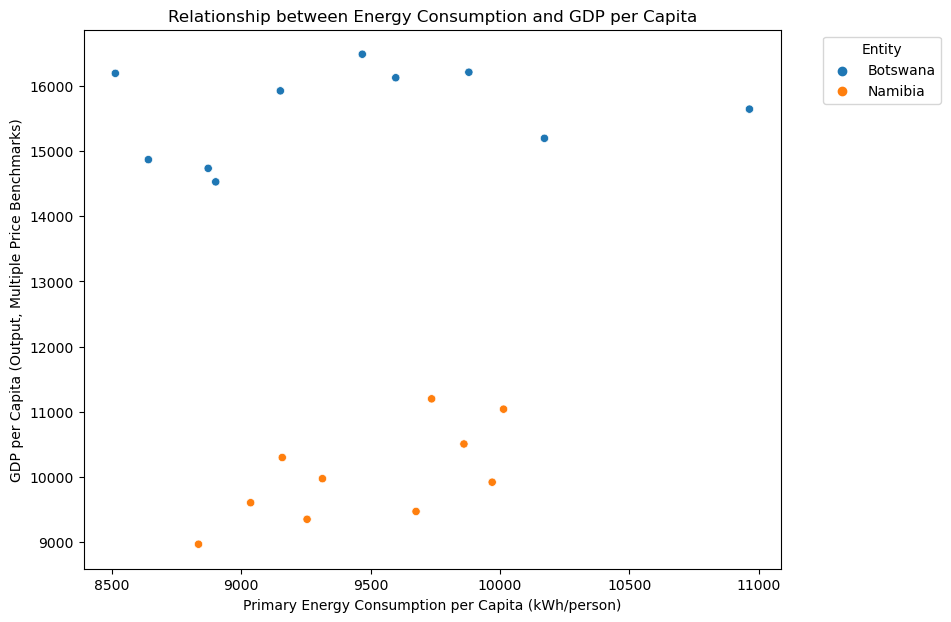

In [38]:
plt.figure(figsize=(9, 7))

sns.scatterplot(data=filtered_data, x="Primary energy consumption per capita (kWh/person)", y="GDP per capita (output, multiple price benchmarks)",hue="Entity",)

plt.title("Relationship between Energy Consumption and GDP per Capita")  
plt.xlabel("Primary Energy Consumption per Capita (kWh/person)")
plt.ylabel("GDP per Capita (Output, Multiple Price Benchmarks)") 

plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc=2)  
plt.show()

We observe that over the past decade (2010 and 2019), Botswana has had relatively high output and energy use compared to Namibia, although they have a similar population. We explore this observation with other visualizations as seen below.

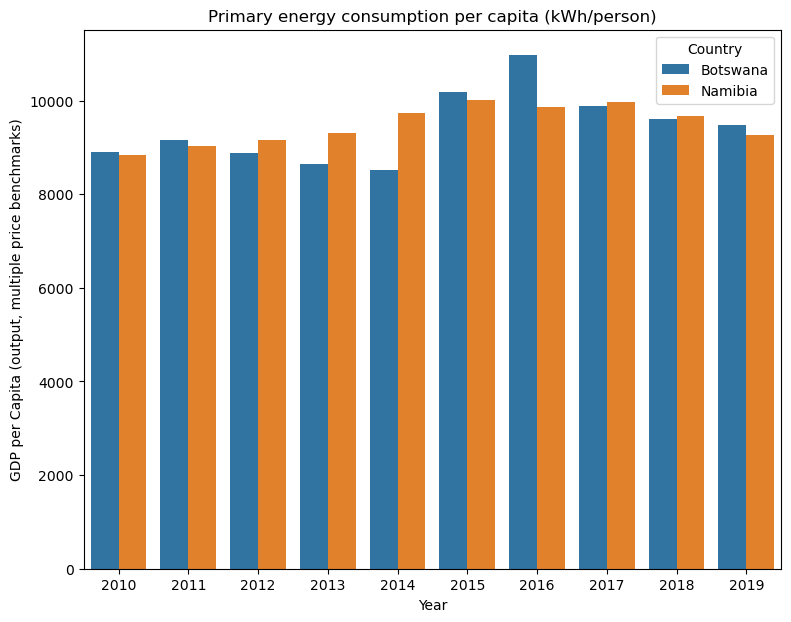

In [39]:
#  bar charts for GDP per capita
plt.figure(figsize=(9, 7))

# Create a bar chart
sns.barplot(x='Year', y='Primary energy consumption per capita (kWh/person)', hue='Entity', data=filtered_data)

plt.title('Primary energy consumption per capita (kWh/person)')
plt.ylabel('GDP per Capita (output, multiple price benchmarks)')
plt.xlabel('Year')

plt.legend(title='Country')
plt.show()

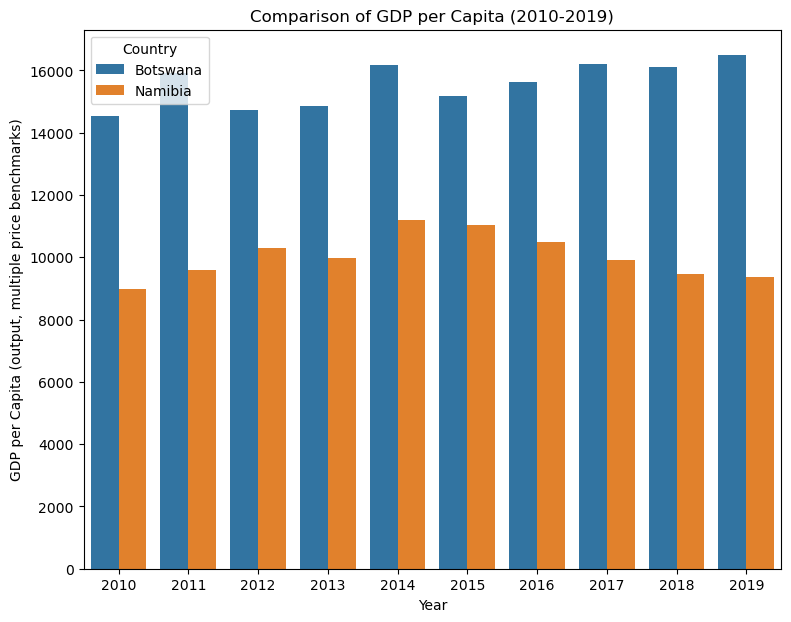

In [40]:
# Create bar charts for GDP per capita
plt.figure(figsize=(9, 7))

# Create a bar chart
sns.barplot(x='Year', y='GDP per capita (output, multiple price benchmarks)', hue='Entity', data=filtered_data)

plt.title('Comparison of GDP per Capita (2010-2019)')
plt.ylabel('GDP per Capita (output, multiple price benchmarks)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.show()

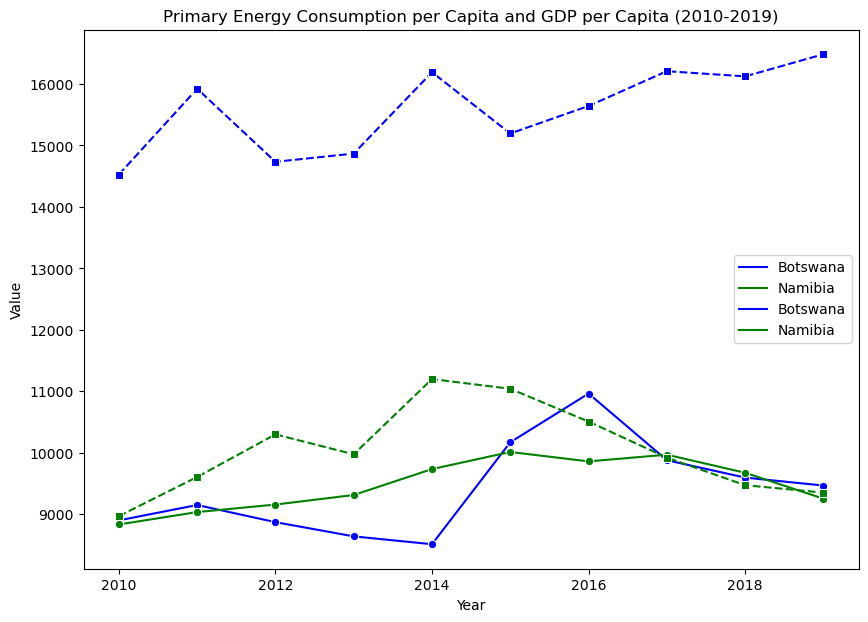

In [43]:
filtered_data = pd.DataFrame(filtered_data)  
plt.figure(figsize=(10, 7))

# Energy use per capita to GDP
filtered_data['Energy to GDP ratio'] = filtered_data['Primary energy consumption per capita (kWh/person)'] / filtered_data['GDP per capita (output, multiple price benchmarks)']
colors = ["blue", "green"]  

# Primary energy consumption per capita
sns.lineplot(data=filtered_data, x="Year", y="Primary energy consumption per capita (kWh/person)", hue="Entity", marker='o', palette=colors)

# Plot for GDP per capita
sns.lineplot(data=filtered_data, x="Year", y="GDP per capita (output, multiple price benchmarks)", hue="Entity", marker='s', linestyle='--', palette=colors)

plt.title('Primary Energy Consumption per Capita and GDP per Capita (2010-2019)')
plt.ylabel('Value')
plt.legend()

# Show plot
plt.show()


The first graph displays the trend of primary energy consumption per capita (solid lines) and GDP per capita (dashed lines) from 2010 to 2019 for both Botswana and Namibia.

Botswana has a much higher GDP per capita compared to Namibia. The gap between the GDP per capita for Botswana and its energy consumption per capita which might be because a large amount of the population lives in rural areas where energy use,as defined by Our World in Data is inaccessible. Thus, the data may only be capturing the highly populated cities and towns. Botswana's energy consumption per capita appears to fluctuate but shows a general upward trend, peaking in 2015 before decreasing. On the other hand, Namibia's energy consumption per capita is generally increasing year by year.

Botswana's energy consumption per capita is higher than Namibia's, suggesting Botswana might have a higher industrial activity level or a different energy policy. Both countries seem to experience growth in GDP per capita over the years, although there are some fluctuations. Namibia's GDP per capita increased significantly from 2010 to 2016 but then slowed down.

# Question 4 - How do the output and energy consumption trends of countries with populations close to Namibia's and Botswana's figures compare over the past decade?

We find that countries with a similar population as Botswana and Namibia (2.5 million) in the dataeset are Lithuania, Qatar and Gambia. So we filter for them.

In [44]:
# Filter for Namibia, Botswana, Lithuania, Qatar, Gambia
country_filter = merged_data['Entity'].isin(['Namibia', 'Botswana', 'Lithuania', 'Qatar', 'Gambia'])

# Filter for the years 2010 through 2019
year_filter = merged_data['Year'].between(2010, 2019)

# Apply both filters
popu_data = merged_data[country_filter & year_filter]
popu_data

,Entity,Code,Year,"GDP per capita (output, multiple price benchmarks)",Primary energy consumption per capita (kWh/person)
905,Botswana,BWA,2010,14527.1200,8901.26700
906,Botswana,BWA,2011,15922.7050,9151.25500
907,Botswana,BWA,2012,14734.3840,8872.19900
908,Botswana,BWA,2013,14868.1270,8641.08100
909,Botswana,BWA,2014,16191.0770,8513.39500
910,Botswana,BWA,2015,15194.8710,10171.93500
911,Botswana,BWA,2016,15642.3980,10964.35500
912,Botswana,BWA,2017,16208.2570,9879.75700
913,Botswana,BWA,2018,16123.9940,9597.18400
914,Botswana,BWA,2019,16484.3750,9467.98400


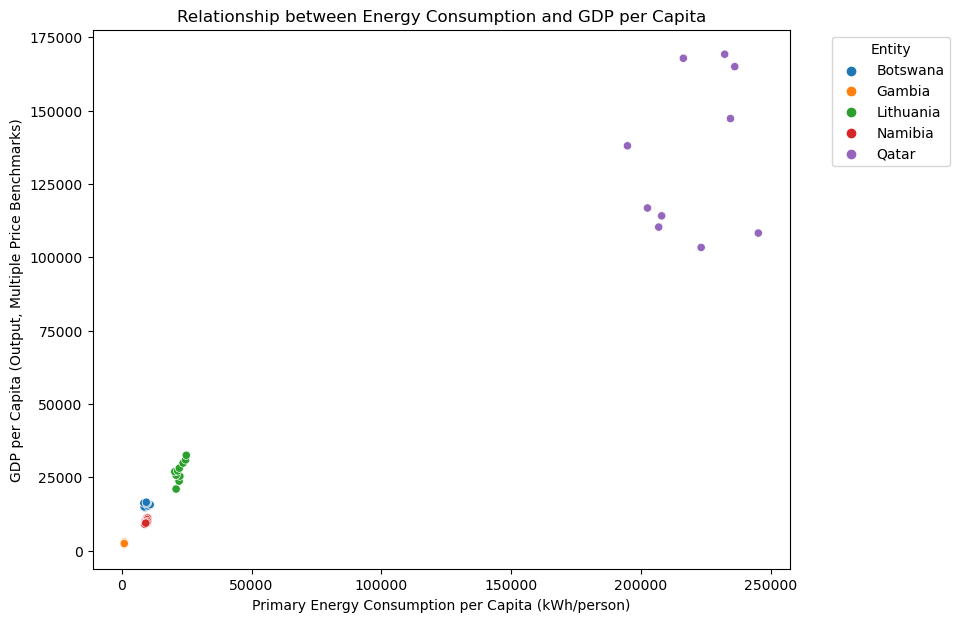

In [45]:
plt.figure(figsize=(9, 7))

sns.scatterplot(data=popu_data, x="Primary energy consumption per capita (kWh/person)", y="GDP per capita (output, multiple price benchmarks)",hue="Entity",)

plt.title("Relationship between Energy Consumption and GDP per Capita")  
plt.xlabel("Primary Energy Consumption per Capita (kWh/person)")
plt.ylabel("GDP per Capita (Output, Multiple Price Benchmarks)") 

plt.legend(title='Entity', bbox_to_anchor=(1.05, 1), loc=2)  
plt.show()

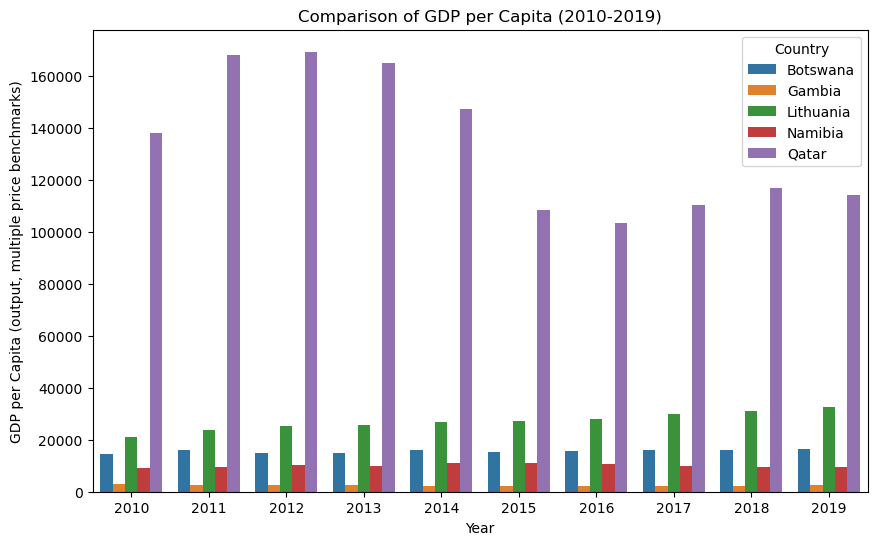

In [46]:
# Create bar charts for GDP per capita
plt.figure(figsize=(10, 6))

# Create a bar chart
sns.barplot(x='Year', y='GDP per capita (output, multiple price benchmarks)', hue='Entity', data=popu_data)

plt.title('Comparison of GDP per Capita (2010-2019)')
plt.ylabel('GDP per Capita (output, multiple price benchmarks)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.show()

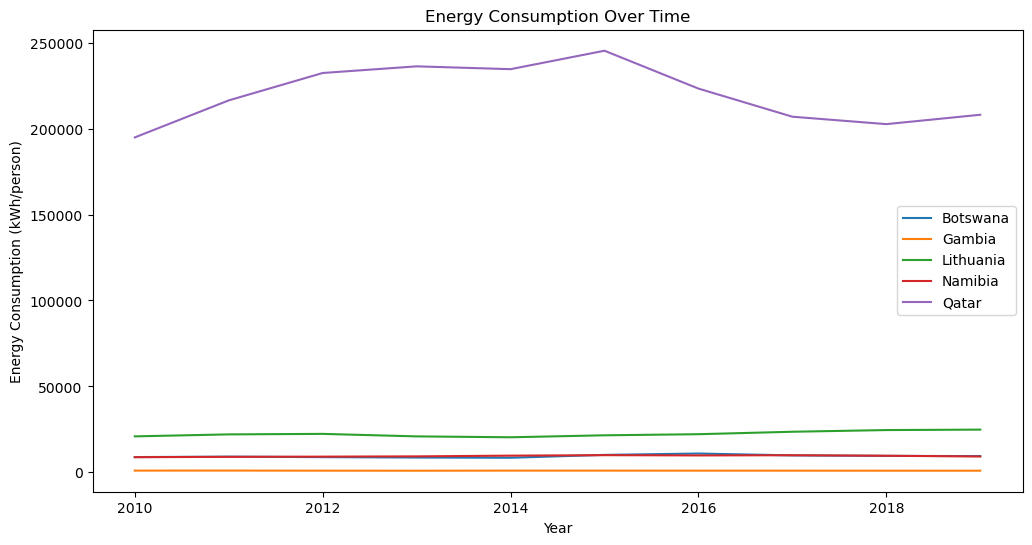

In [47]:
# Time series data
plt.figure(figsize=(12, 6))
for country in popu_data['Entity'].unique():
    country_data = popu_data[popu_data['Entity'] == country]
    plt.plot(country_data['Year'], country_data['Primary energy consumption per capita (kWh/person)'], label=country)
plt.xlabel('Year')
plt.ylabel('Energy Consumption (kWh/person)')
plt.title('Energy Consumption Over Time')
plt.legend()
plt.show()

In our analysis, we focused on countries with populations that are close (+/- 2 million) Namibia's and Botswana's populations. We found that Namibia and Botswana have similar levels of energy usage compared to Gambia, Lithuania and Qatar. Qatar stands out with a significantly higher energy consumption per capita. This could be because of Qatar's oil and gas resources, which contribute to both its higher GDP per capita and increased domestic energy availability. Meanwhile, Lithuania and Gambia represent two distinct tiers of energy consumption, likely influenced by their differing economic structures and energy resources. Therefore, with this, we find that our hypothesis holds and Qatar is leading with both energy use and output.

The limitations to this study might be the availability of data/data collections. Some countries are missing entries for some years which impacts the results. If we had the time we would run regressions to explore confounding factors such as policy, technological advancements, climate and trade.